In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, PowerTransformer, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [12]:
test_data = pd.read_csv('../data/raw/test.csv')
train_data = pd.read_csv('../data/raw/train.csv')

In [13]:
test_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,262106,65,Male,16.0,16,3,14,Standard,Monthly,853.00,4.0,06-21,07-05,active
1,37061,23,Male,NaN,12,3,6,Premium,Annual,860.00,21.0,06-03,06-09,active
2,361832,49,Male,NaN,25,2,4,Premium,Quarterly,905.58,15.0,06-13,06-17,active
3,425516,25,Female,48.0,11,7,16,Premium,Quarterly,446.00,8.0,06-14,06-30,active
4,60597,52,Female,4.0,10,6,3,Basic,Monthly,933.29,28.0,06-17,06-20,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133771,396573,19,Male,47.0,17,4,3,Basic,Monthly,743.00,1.0,06-20,06-23,active
133772,452602,27,Male,42.0,5,9,16,Standard,Annual,1289.78,2.0,06-27,07-13,active
133773,424958,38,Female,NaN,17,9,30,Standard,Monthly,1678.38,2.0,06-11,07-11,active
133774,242104,34,Male,44.0,3,9,7,Standard,Monthly,564.00,7.0,06-29,07-06,active


In [14]:
print(test_data.shape)
print(test_data.info())

(133776, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133776 entries, 0 to 133775
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         133776 non-null  int64  
 1   Age                133776 non-null  int64  
 2   Gender             133776 non-null  object 
 3   Tenure             106578 non-null  float64
 4   Usage Frequency    133776 non-null  int64  
 5   Support Calls      106238 non-null  object 
 6   Payment Delay      133776 non-null  int64  
 7   Subscription Type  133776 non-null  object 
 8   Contract Length    133776 non-null  object 
 9   Total Spend        133776 non-null  float64
 10  Last Interaction   106581 non-null  float64
 11  Last Due Date      133776 non-null  object 
 12  Last Payment Date  133776 non-null  object 
 13  Customer Status    133776 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 14.3+ MB
None


In [15]:
train_data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303119,434620,27,Male,NaN,25,7,NaN,Standard,Quarterly,347.58,28.0,inactive,06-19,07-18,1
303120,25550,40,Male,NaN,14,NaN,7.0,Standard,Quarterly,855.69,21.0,active,06-22,06-29,0
303121,428638,47,Male,15.0,21,6,NaN,Premium,Quarterly,459.00,NaN,inactive,06-21,06-24,1
303122,166991,34,Female,39.0,12,NaN,0.0,Basic,Monthly,872.00,12.0,inactive,06-09,06-09,1


In [16]:
print(train_data.shape)
print(train_data.info())

(303124, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Tenure             241103 non-null  float64
 4   Usage Frequency    303124 non-null  int64  
 5   Support Calls      240704 non-null  object 
 6   Payment Delay      214800 non-null  float64
 7   Subscription Type  303124 non-null  object 
 8   Contract Length    303124 non-null  object 
 9   Total Spend        303124 non-null  float64
 10  Last Interaction   240574 non-null  float64
 11  Customer Status    303124 non-null  object 
 12  Last Due Date      303124 non-null  object 
 13  Last Payment Date  303124 non-null  object 
 14  Churn              303124 non-null  int64  
dtypes: float64(4), int64(4), object(7)
mem

In [17]:
# X = train_data[['Total Spend', 'Gender', 'Subscription Type', 'Usage Frequency', 'Age', 'Total Spend', 'Customer Status','Payment Delay', 'Tenure', 'Last Payment Date', 'Last Due Date', 'Contract Length']]
# X = train_data[['Last Interaction', 'Tenure', 'Payment Delay', 'Usage Frequency', 'Age', 'Subscription Type']]
X = train_data[[ 'Tenure', 'Payment Delay', 'Usage Frequency']]
X = pd.get_dummies(X, drop_first=False)
y = train_data['Churn']
X

,Tenure,Payment Delay,Usage Frequency
0,NaN,17.0,26
1,36.0,15.0,22
2,44.0,NaN,14
3,39.0,14.0,21
4,NaN,5.0,26
...,...,...,...
303119,NaN,NaN,25
303120,NaN,7.0,14
303121,15.0,NaN,21
303122,39.0,0.0,12


In [18]:
train_data.isnull().sum()
# drop late payment columns due to high null values
# train_data.drop(columns=['Last Payment Date', 'Last Due Date'], inplace=True)

CustomerID               0
Age                      0
Gender                   0
Tenure               62021
Usage Frequency          0
Support Calls        62420
Payment Delay        88324
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     62550
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
dtype: int64

In [19]:
train_data_cleaned = train_data.dropna().copy()
print(train_data_cleaned.shape)

(107639, 15)


In [20]:
train_data_cleaned.head() 

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
12,468959,30,Male,54.0,13,3,0.0,Basic,Quarterly,522.78,19.0,active,06-18,06-18,0
15,466346,43,Female,11.0,24,none,15.0,Premium,Quarterly,566.46,11.0,active,06-28,07-13,0
20,187564,40,Male,14.0,3,none,2.0,Basic,Quarterly,198.00,20.0,active,06-08,06-10,0
22,304125,61,Female,25.0,14,2,2.0,Premium,Monthly,427.00,13.0,active,06-22,06-24,0


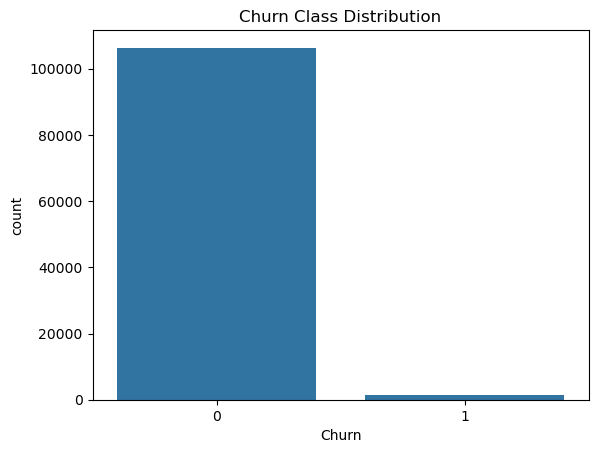

In [21]:
sns.countplot(x='Churn', data=train_data_cleaned)
plt.title('Churn Class Distribution')
plt.show()

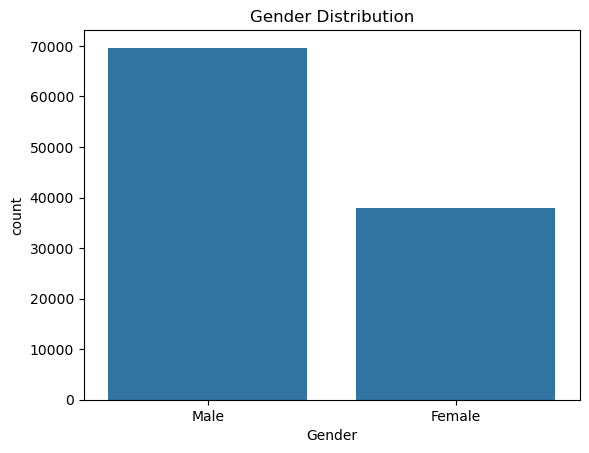

In [22]:
sns.countplot(x='Gender', data=train_data_cleaned)
plt.title('Gender Distribution')
plt.show()

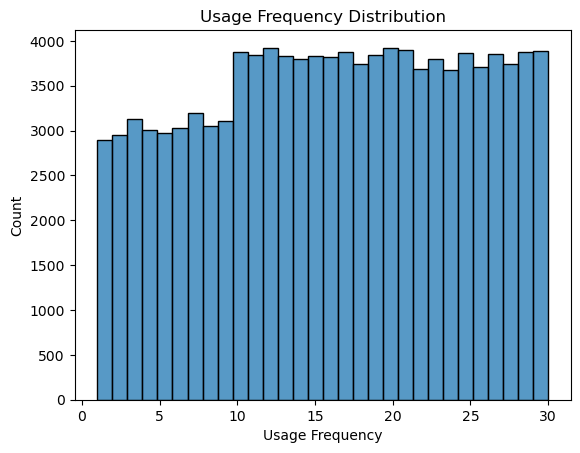

In [23]:
sns.histplot(train_data_cleaned['Usage Frequency'], bins=30)
plt.title('Usage Frequency Distribution')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (212186, 3)
Testing data: (90938, 3)


### Random Forest Classifier

In [25]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9901
F1 Score: 0.9833
Confusion Matrix:
[[63496   203]
 [  699 26540]]


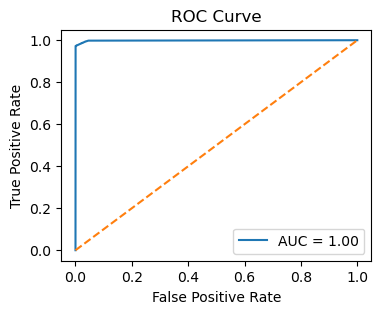

In [26]:
# AUC-ROC
from sklearn.metrics import roc_curve


y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
roc_auc

0.9984126666098941

In [28]:
customer_ids = test_data['CustomerID']

for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

X_test_final = test_data[X.columns]

churn_predictions = clf.predict_proba(X_test_final)[:, 1]

churn_submission = pd.DataFrame({
    'CustomerID': customer_ids,
    'Churn_Probability': churn_predictions
})
churn_submission.to_csv('dave_churn_submission_12:33.csv', index=False)
print("Churn predictions saved to 'dave_churn_submission.csv'")

Churn predictions saved to 'dave_churn_submission.csv'


### KNN model

In [30]:
# knn model
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)    
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
# metrics for knn
y_knn_pred = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_knn_pred)
precision_knn = precision_score(y_test, y_knn_pred)
recall_knn = recall_score(y_test, y_knn_pred)
f1_knn = f1_score(y_test, y_knn_pred)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")


KNN Accuracy: 0.9475
KNN Precision: 0.8845
KNN Recall: 0.9485
KNN F1 Score: 0.9154


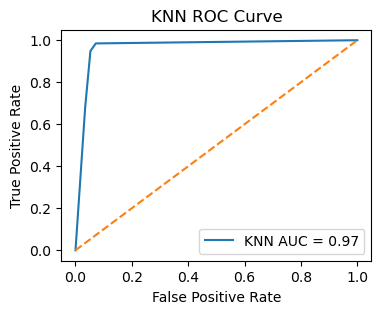

0.9661866682742309

In [32]:
# ROC-AUC for knn
y_knn_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn_prob)
roc_auc_knn = roc_auc_score(y_test, y_knn_prob)
plt.figure(figsize=(4,3))
plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()  
roc_auc_knn

In [33]:
roc_auc_knn

0.9661866682742309

In [ ]:
# save knn predictions
roc_auc_knn 
knn_churn_predictions = knn.predict_proba(X_test_final)[:, 1]   
knn_churn_submission = pd.DataFrame({
    'CustomerID': customer_ids,
    'Churn_Probability_KNN': knn_churn_predictions
})
knn_churn_submission.to_csv('knn_churn_predictions_dave.csv', index=False)
print("KNN Churn predictions saved to 'knn_churn_predictions_dave.csv'")

/opt/miniconda3/envs/credit_fraud/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN Churn predictions saved to 'knn_churn_predictions_dave.csv'


### Linear Regression model

In [ ]:
# linear regression model
from sklearn.linear_model import LogisticRegression

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LogisticRegression()
reg_all.fit(X_train_lr, y_train_lr)
y_pred = reg_all.predict(X_test_lr)

In [ ]:
reg_all.score(X_test_lr, y_test_lr)

0.7742637841166509

In [ ]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test_lr, y_pred)

0.4751170549278873

In [ ]:
# cross validation for logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
cv_results.mean()


0.15629281212838722

In [ ]:
# metrics for logistic regression
accuracy_lr = accuracy_score(y_test_lr, y_pred)
precision_lr = precision_score(y_test_lr, y_pred)
recall_lr = recall_score(y_test_lr, y_pred)
f1_lr = f1_score(y_test_lr, y_pred)
roc_auc_auc_lr = roc_auc_score(y_test_lr, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")   
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_auc_lr:.4f}")

Logistic Regression Accuracy: 0.7743
Logistic Regression Precision: 0.7401
Logistic Regression Recall: 0.3797
Logistic Regression F1 Score: 0.5019
Logistic Regression ROC AUC: 0.6613


In [ ]:
# Use the cleaned dataset (dropna was applied earlier)
X = train_data_cleaned.drop(columns='Churn')
y = train_data_cleaned['Churn']

X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[-1.22213062,  2.33543601, -1.6776849 , ..., -0.01669695,
        -0.01313639, -0.01152115],
       [-1.09814868,  0.67526565,  0.70866207, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [ 0.3829556 , -1.57084719, -0.28079887, ..., -0.01669695,
        -0.01313639, -0.01152115],
       ...,
       [-0.03138854, -1.18021887, -1.2702598 , ..., -0.01669695,
        -0.01313639, -0.01152115],
       [-1.52714971,  0.57760857, -0.10618811, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [-0.06327957,  0.67526565,  0.06842264, ..., -0.01669695,
        -0.01313639, -0.01152115]])

In [ ]:
y_train

152144    0
216702    0
85274     0
141206    0
281881    0
         ..
31812     0
18573     0
48711     0
10067     0
253973    0
Name: Churn, Length: 75347, dtype: int64

In [ ]:
X_test

array([[ 1.11546491,  0.38229441,  0.88327282, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [-1.64441163,  0.96823689, -0.45540962, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [ 0.98742909, -0.69193347,  1.63991942, ..., -0.01669695,
        -0.01313639, -0.01152115],
       ...,
       [ 0.23076736, -1.57084719, -0.39720604, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [-0.32209256, -0.30130515,  0.65045849, ..., -0.01669695,
        -0.01313639, -0.01152115],
       [ 0.27550368,  0.67526565,  0.06842264, ..., -0.01669695,
        -0.01313639, -0.01152115]])

### Never Churn Model

In [ ]:
# Never Churn Model
y_pred_never = [0] * len(y_test)
print(y_pred_never[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred_never)
precision = precision_score(y_test, y_pred_never)
recall = recall_score(y_test, y_pred_never)
f1 = f1_score(y_test, y_pred_never)
print(f'Never Churn Model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

Never Churn Model - Accuracy: 0.9880, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000


/opt/miniconda3/envs/credit_fraud/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


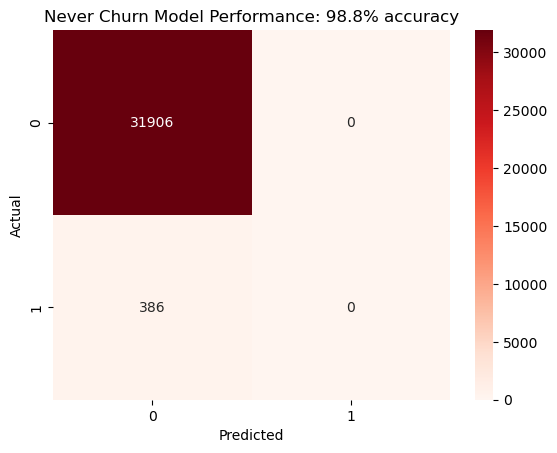

In [ ]:
conf_matrix_never_fraud = confusion_matrix(y_test, y_pred_never)
acc = round(100*accuracy_score(y_test, y_pred_never),1)
sns.heatmap(conf_matrix_never_fraud, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title(f'Never Churn Model Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import sklearn.metrics as metrics

y_prob_never = [0.0] * len(y_test)  # Never churn model always predicts 0 probability for churn
roc_auc_never = metrics.roc_auc_score(y_test, y_prob_never)
print(f'Never Churn Model ROC AUC: {roc_auc_never:.4f}')

Never Churn Model ROC AUC: 0.5000


In [ ]:
customer_ids = test_data['CustomerID']

# For the "never churn" baseline, predict 0.0 probability for all samples
churn_probs_never = [0.0] * len(customer_ids)

# Create submission file
submission = pd.DataFrame({'CustomerID': customer_ids, 'Churn': churn_probs_never})
submission.to_csv('dave_submission(never_churn_model).csv', index=False)
print(f'Saved dave_submission(never_churn_model).csv with shape: {submission.shape}')

Saved dave_submission(never_churn_model).csv with shape: (133776, 2)


### Baisc KNN model

In [ ]:
# Basic Modeling with k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = metrics.roc_auc_score(y_test, y_pred_knn)
print(f'k-NN ROC AUC: {roc_auc_knn:.4f}')

k-NN ROC AUC: 1.0000


In [ ]:
customer_ids = test_data['CustomerID']
test_data_prepared = test_data.drop('CustomerID', axis=1)
test_data_prepared = pd.get_dummies(test_data_prepared, drop_first=True)

for col in X.columns:
    if col not in test_data_prepared.columns:
        test_data_prepared[col] = False

test_data_prepared = test_data_prepared[X.columns]

# Fill missing values with median (same strategy used implicitly during training)
test_data_prepared = test_data_prepared.fillna(test_data_prepared.median())

test_data_scaled = scaler.transform(test_data_prepared)

# Predict churn probabilities
churn_probs = knn.predict_proba(test_data_scaled)[:, 1]

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


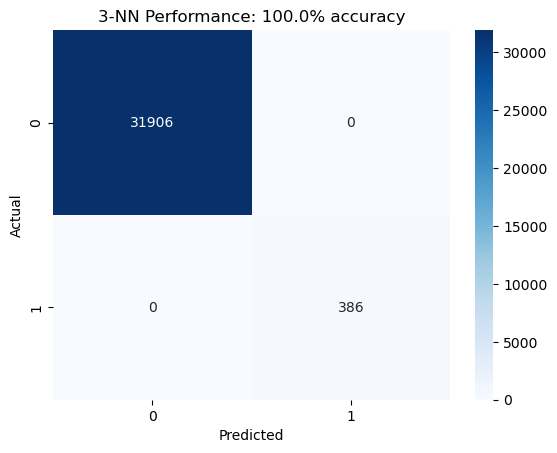

In [ ]:
# Confusion matrix for k-NN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
acc = round(100*accuracy_score(y_test, y_pred_knn),1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'3-NN Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}') 

k-NN Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


In [ ]:
# # Create submission file
# submission = pd.DataFrame({'CustomerID': customer_ids, 'Churn': churn_probs})
# submission.to_csv('dave_submission(knn_model).csv', index=False)
# print(f'Saved dave_submission.csv with shape: {submission.shape}')

### Decision Tree Classifier Model

In [ ]:
# Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


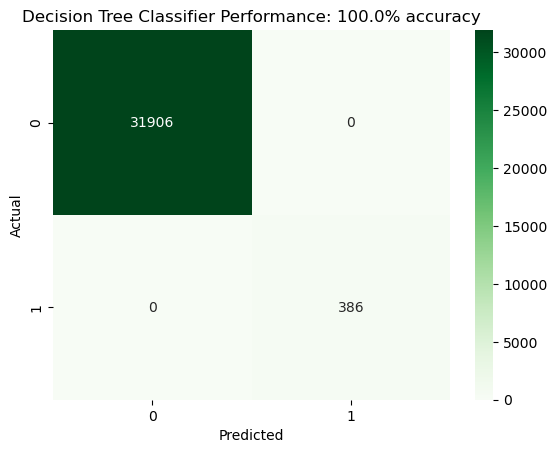

In [ ]:
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
acc = round(100*accuracy_score(y_test, y_pred_dtc),1)
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title(f'Decision Tree Classifier Performance: {acc}% accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
print(y_prob_dtc[:100])
roc_auc_dtc = metrics.roc_auc_score(y_test, y_prob_dtc)
print(f'Decision Tree Classifier ROC AUC: {roc_auc_dtc:.4f}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Decision Tree Classifier ROC AUC: 1.0000


In [ ]:
# accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_test, y_prob_dtc)
precision = precision_score(y_test, y_prob_dtc)
recall = recall_score(y_test, y_prob_dtc)
f1 = f1_score(y_test, y_prob_dtc)
print(f'DecisionTreeClassifier Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

DecisionTreeClassifier Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


In [ ]:
# customer_ids = test_data['CustomerID']
# test_data_prepared = test_data.drop(columns=['CustomerID', 'Churn'], errors='ignore').copy()
# test_data_prepared = pd.get_dummies(test_data_prepared, drop_first=True)

# # Align columns with training data
# for col in X.columns:
#     if col not in test_data_prepared.columns:
#         test_data_prepared[col] = False

# test_data_prepared = test_data_prepared[X.columns]

# # Fill missing values with median (same strategy used implicitly during training)
# test_data_prepared = test_data_prepared.fillna(test_data_prepared.median())

# test_data_scaled = scaler.transform(test_data_prepared)

# # Predict churn probabilities
# churn_probs_dtc = dtc.predict_proba(test_data_scaled)[:, 1]

In [ ]:
# # Create submission file
# submission = pd.DataFrame({'CustomerID': customer_ids, 'Churn': churn_probs_dtc})
# submission.to_csv('dave_submission(dtc_model).csv', index=False)
# print(f'Saved dave_submission(dtc_model).csv with shape: {submission.shape}')

NameError: name 'churn_probs_dtc' is not defined

In [ ]:
# compare ROC AUC scores
print(f'Never Churn Model ROC AUC: {roc_auc_never:.4f}')
print(f'k-NN ROC AUC: {roc_auc_knn:.4f}')
print(f'Decision Tree Classifier ROC AUC: {roc_auc_dtc:.4f}')
print(f'Random Forest Classifier ROC AUC: {roc_auc:.4f}')


Never Churn Model ROC AUC: 0.5000
k-NN ROC AUC: 1.0000
Decision Tree Classifier ROC AUC: 1.0000
Random Forest Classifier ROC AUC: 0.8562


### Comparison of models

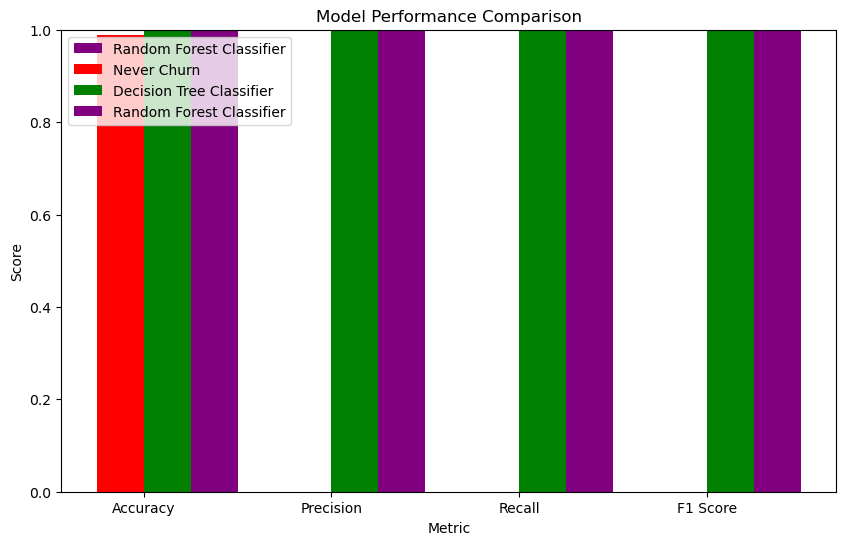

In [ ]:
# Compute metrics for "Never Churn"
accuracy_never_churn = accuracy_score(y_test, y_pred_never)
precision_never_churn = precision_score(y_test, y_pred_never, zero_division=0)
recall_never_churn = recall_score(y_test, y_pred_never)
f1_never_churn = f1_score(y_test, y_pred_never)

# Compute metrics for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Compute metrics for Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

# Compute metrics for Random Forest Classifier
# Retrain Random Forest on current data split
clf_new = RandomForestClassifier(random_state=42)
clf_new.fit(X_train, y_train)
y_pred_rf = clf_new.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Prepare data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
never_churn_scores = [accuracy_never_churn, precision_never_churn, recall_never_churn, f1_never_churn]
dtc_scores = [accuracy_dtc, precision_dtc, recall_dtc, f1_dtc]
comparison_transaction_data = pd.DataFrame({
    'Metric': metrics,
    'k-NN': knn_scores,
    'Never Churn': never_churn_scores,
    'Decision Tree Classifier': dtc_scores,
    'Random Forest Classifier': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(metrics))

rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]
bar4 = ax.bar([i + 3 * bar_width for i in index], rf_scores, bar_width, label='Random Forest Classifier', color='purple')
bar2 = ax.bar([i + bar_width for i in index], never_churn_scores, bar_width, label='Never Churn', color='red')
bar3 = ax.bar([i + 2 * bar_width for i in index], dtc_scores, bar_width, label='Decision Tree Classifier', color='green')
bar4 = ax.bar([i + 3 * bar_width for i in index], [accuracy_rf, precision_rf, recall_rf, f1_rf], bar_width, label='Random Forest Classifier', color='purple')

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

In [ ]:
# ...existing code...
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline

# 1) Train vs Test metrics (use the already-scaled X_train, X_test and trained models)
# KNN
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = y_pred_knn  # you already computed this

print("k-NN train metrics:")
print("  Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("  Precision:", precision_score(y_train, y_train_pred_knn, zero_division=0))
print("  Recall:", recall_score(y_train, y_train_pred_knn, zero_division=0))
print("  F1:", f1_score(y_train, y_train_pred_knn, zero_division=0))

print("k-NN test metrics:")
print("  Accuracy:", accuracy_score(y_test, y_test_pred_knn))
print("  Precision:", precision_score(y_test, y_test_pred_knn, zero_division=0))
print("  Recall:", recall_score(y_test, y_test_pred_knn, zero_division=0))
print("  F1:", f1_score(y_test, y_test_pred_knn, zero_division=0))

# Decision Tree (use label predictions, not probabilities for classification metrics)
y_train_pred_dtc = dtc.predict(X_train)
y_test_pred_dtc = y_pred_dtc

print("Decision Tree train/test accuracy:", accuracy_score(y_train, y_train_pred_dtc), accuracy_score(y_test, y_test_pred_dtc))

# 2) Cross-validated ROC AUC (use pipeline so we can pass the raw DataFrame X and y)
# Recreate X_df (one-hot encoded) if needed — here use X from earlier (pd.get_dummies version)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cv_auc_knn = cross_val_score(pipe_knn, X, y, cv=cv, scoring='roc_auc')
print("k-NN CV ROC AUC (5-fold):", cv_auc_knn.mean(), cv_auc_knn)

pipe_dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
cv_auc_dtc = cross_val_score(pipe_dtc, X, y, cv=cv, scoring='roc_auc')
print("Decision Tree CV ROC AUC (5-fold):", cv_auc_dtc.mean(), cv_auc_dtc)

# 3) Optional: quick learning curve for DecisionTree (shows if adding data helps)
train_sizes, train_scores, test_scores = learning_curve(
    pipe_dtc, X, y, cv=cv, scoring='roc_auc', train_sizes=[0.1,0.33,0.55,0.78,1.0], n_jobs=-1
)
print("Learning curve train mean AUCs:", train_scores.mean(axis=1))
print("Learning curve test mean AUCs:", test_scores.mean(axis=1))
# ...existing code...

k-NN train metrics:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1: 1.0
k-NN test metrics:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1: 1.0
Decision Tree train/test accuracy: 1.0 1.0
k-NN CV ROC AUC (5-fold): 0.9999999634145025 [1.         0.99999982 1.         1.         1.        ]
Decision Tree CV ROC AUC (5-fold): 1.0 [1. 1. 1. 1. 1.]
Learning curve train mean AUCs: [1. 1. 1. 1. 1.]
Learning curve test mean AUCs: [1. 1. 1. 1. 1.]


In [ ]:
# show exactly which features the notebook is using
X_df = train_data_cleaned.drop(columns='Churn').copy()
X_df = pd.get_dummies(X_df, drop_first=True)

print("Feature count:", X_df.shape[1])
print("First 50 feature names:", X_df.columns.tolist()[:50])
print("Is CustomerID included?", 'CustomerID' in X_df.columns)
print("\nDtypes breakdown:\n", X_df.dtypes.value_counts())
print("\nTop missing counts (if any):\n", X_df.isnull().sum().sort_values(ascending=False).head(20))

Feature count: 113
First 50 feature names: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Male', 'Support Calls_10', 'Support Calls_2', 'Support Calls_3', 'Support Calls_4', 'Support Calls_5', 'Support Calls_6', 'Support Calls_7', 'Support Calls_8', 'Support Calls_9', 'Support Calls_none', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly', 'Customer Status_inactive', 'Last Due Date_06-02', 'Last Due Date_06-03', 'Last Due Date_06-04', 'Last Due Date_06-05', 'Last Due Date_06-06', 'Last Due Date_06-07', 'Last Due Date_06-08', 'Last Due Date_06-09', 'Last Due Date_06-10', 'Last Due Date_06-11', 'Last Due Date_06-12', 'Last Due Date_06-13', 'Last Due Date_06-14', 'Last Due Date_06-15', 'Last Due Date_06-16', 'Last Due Date_06-17', 'Last Due Date_06-18', 'Last Due Date_06-19', 'Last Due Date_06-20', 'Last Due Date_06-21', 'Last Due Date_06-22', 'Last Due Date_06-2